In [1]:
import pickle
import numpy as np
from gembed.multigraph import Multigraph

with open('results/rgcn_ops_embeddings.pkl', 'rb') as inobj:
    embeddings = pickle.load(inobj)
with open('results/rgcn_ops_graph.pkl', 'rb') as inobj:
    graph = pickle.load(inobj)

embeddings_dict = {t[0]:t[1] for t in embeddings }
embedding_nodes = [t[0] for t in embeddings]
embedding_vectors = [t[1] for t in embeddings]

In [2]:
graph.summary()

Undirected graph?: False
n nodes: 174
n relation types: 6
n connections: 395
5 most connected nodes: [(u'send_data', 7), (u'move_cursor', 7), (u'keywords', 6), (u'summarize', 6), (u'frequency', 6)]
5 least connected nodes (non-terminal): [(u'op', 1), (u'bool', 1), (u'multiply', 1), (u'trace_mad', 1), (u'logict_lt', 1)]
n terminal nodes: 78
5 most frequent relations: [(u'IS', 93), (u'RELATED_TO', 90), (u'TAKES_ARGTYPE', 73), (u'TAKES_ARGUMENTS', 69), (u'RETURNS', 69)]
5 least frequent relations: [(u'RELATED_TO', 90), (u'TAKES_ARGTYPE', 73), (u'TAKES_ARGUMENTS', 69), (u'RETURNS', 69), (u'SIMILAR_TO', 1)]
equivalent nodes: [[u'zero', u'one', u'two', u'three', u'four'], [u'number', u'char', u'obj', u'coll', u'img', u'vec', u'mat', u'op', u'bool'], [u'nlp_operator', u'image_operator', u'collection_operator', u'vector_operator', u'matrix_operator', u'logic_operator', u'char_operator', u'interface_operator', u'interactive_operator']]


In [3]:
import gembed.plotting as plotting
%matplotlib inline

In [4]:
tnse_pts = plotting.tsneND(embedding_vectors, 2)
#tnse_pts_3d = plotting.tsneND(embedding_vectors, 3)
tnse_pts_3d = np.array(embedding_vectors)
umap_pts = plotting.umap2D(embedding_vectors)

/usr/local/anaconda3/envs/gembed/lib/python2.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


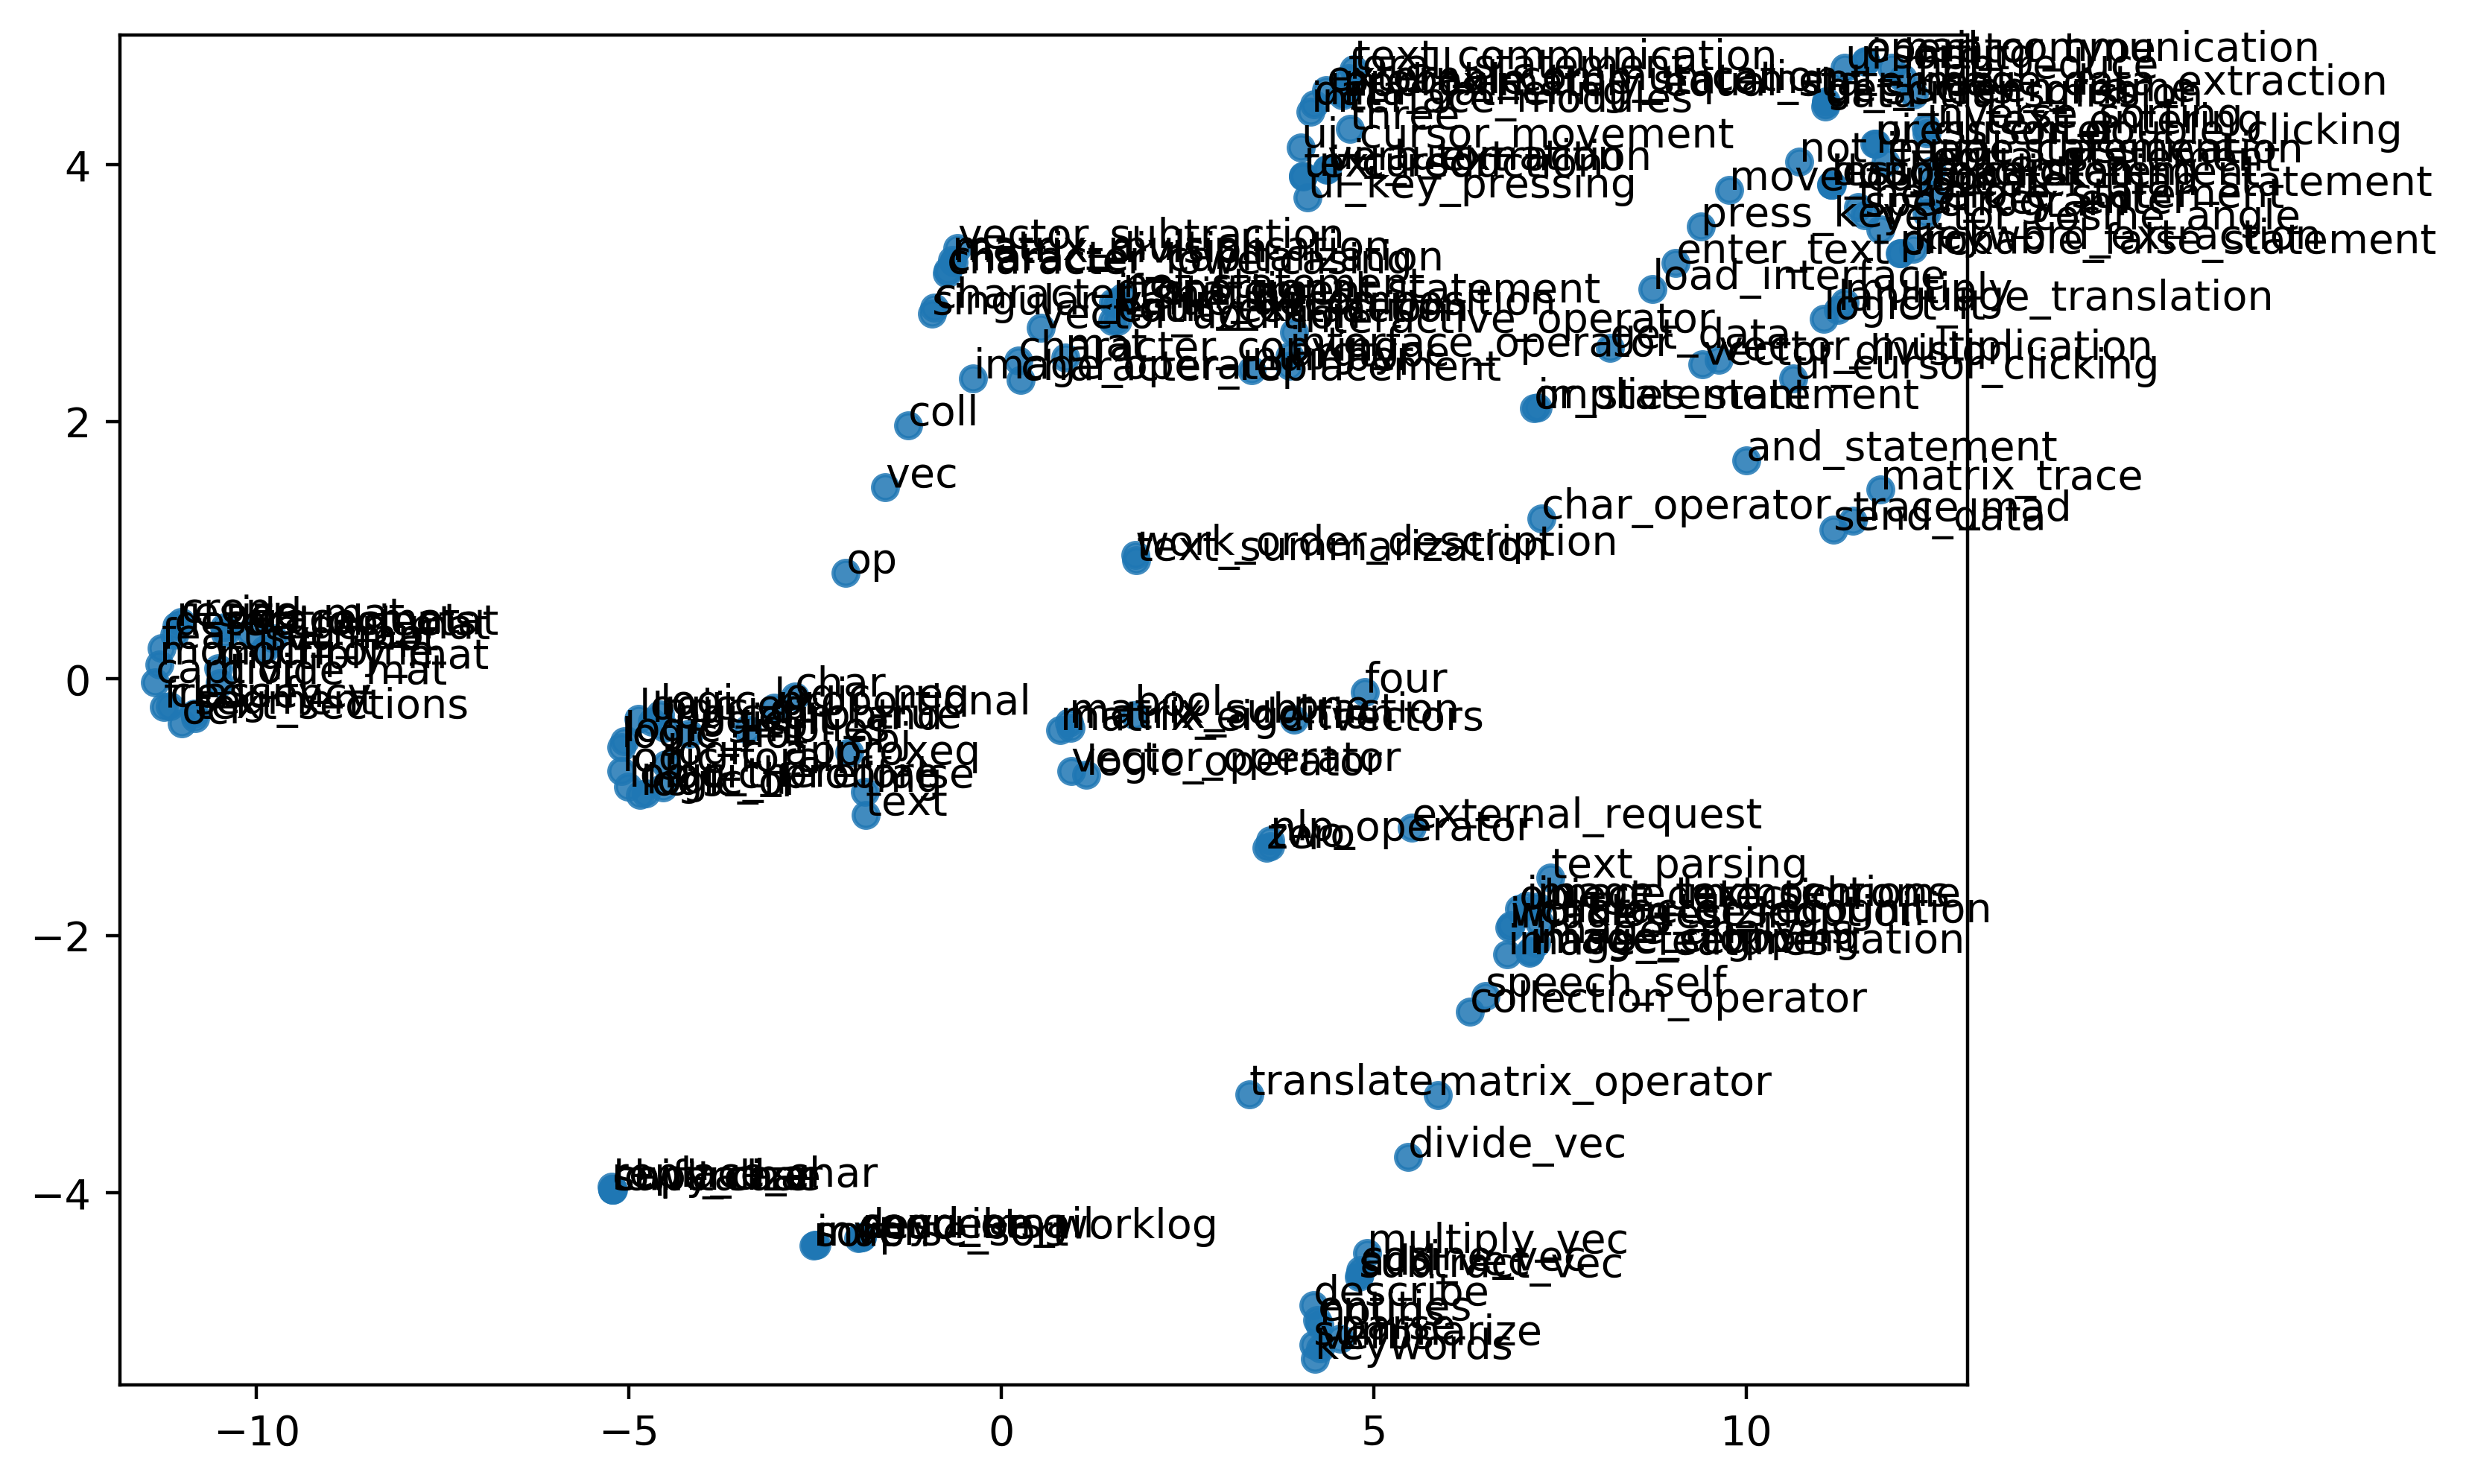

In [5]:

plotting.scatterplot2D(tnse_pts[:,0],tnse_pts[:,1],embedding_nodes)
#plotting.scatterplot2D(umap_pts[:,0],umap_pts[:,1],embedding_nodes)


In [6]:
import unicodecsv as csv 

def get_category_tuple(filename, skip_first_line=False):
    source_names = []
    target_names = []
    with open(filename, 'r') as csvfile:
        graphreader = csv.reader(csvfile)
        i = 0
        for row in graphreader:
            if skip_first_line and i == 0:
                i += 1
                continue
            source_names.append(row[0])
            target_names.append(row[1])
    return zip(source_names, target_names)

def get_category_embeddings(category, embeddings_dict):
    # category is a list a of types (source node name, category label)
    category_embeddings = []
    category_labels = []
    for i in category:
        category_embeddings.append(embeddings_dict[i[0]])
        category_labels.append(i[1])
    return (category_embeddings, category_labels)

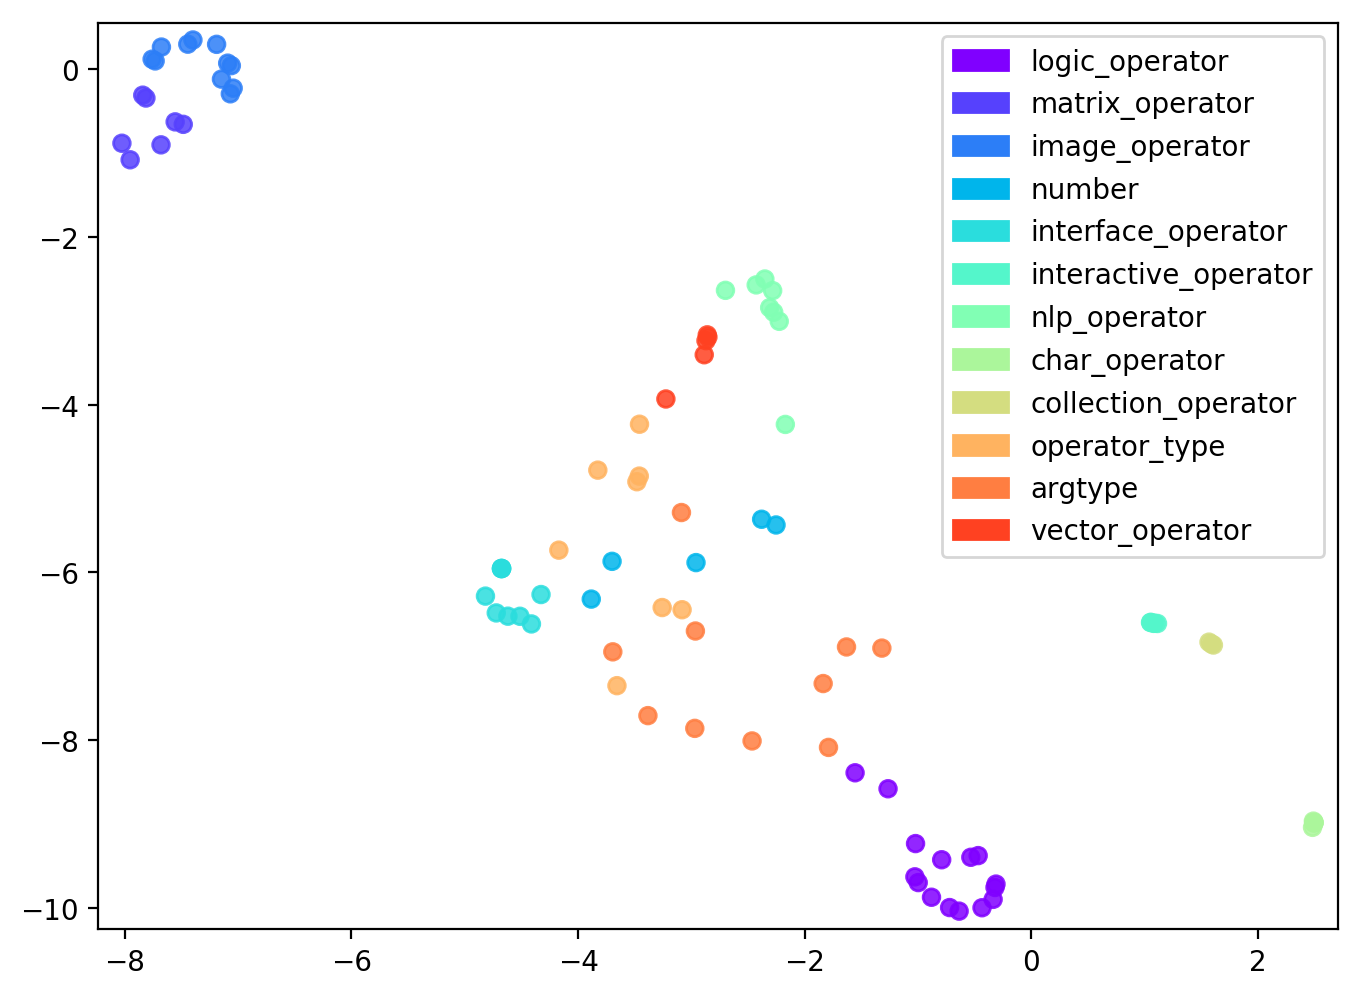

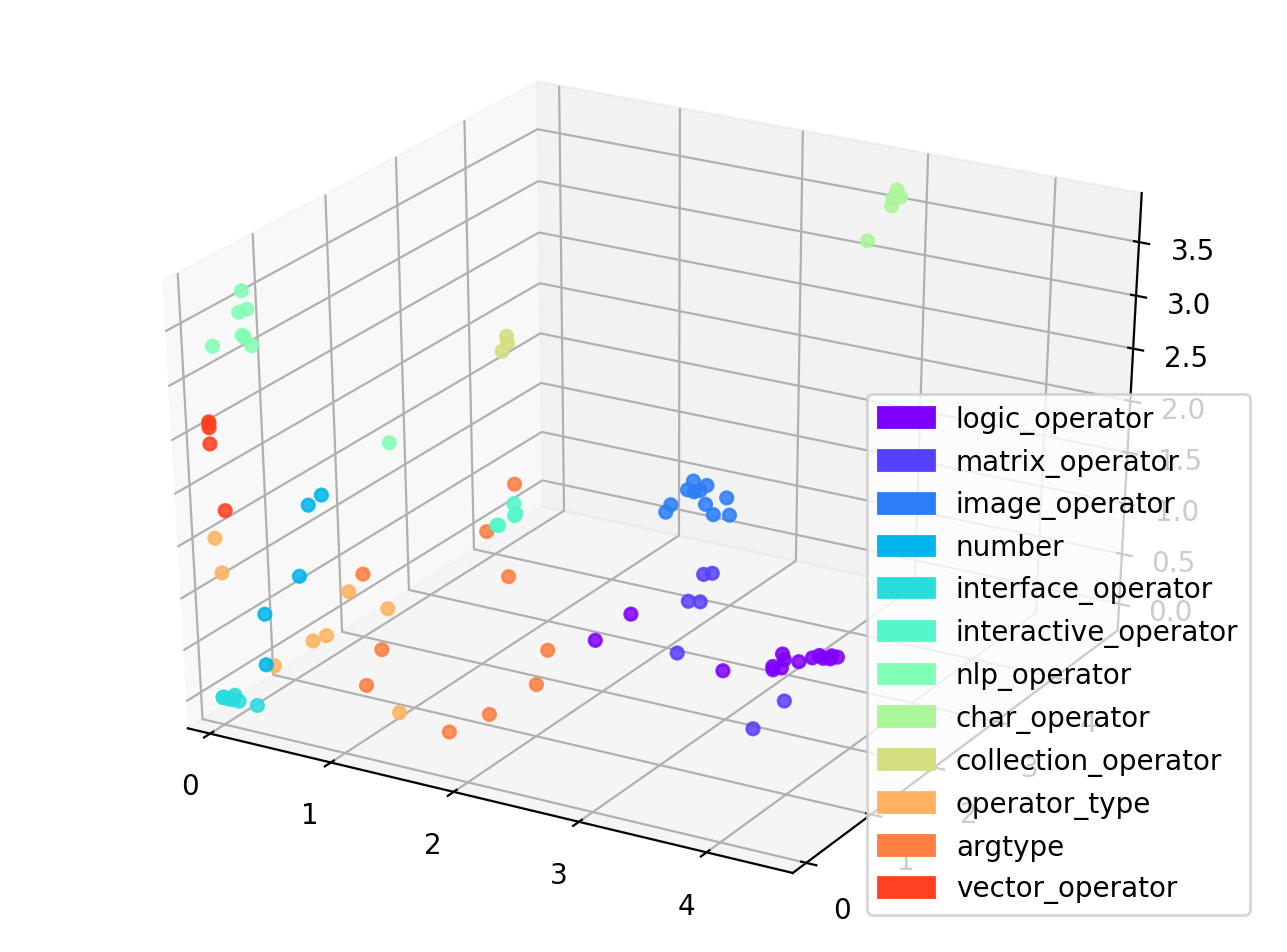

In [7]:
#category_relation = graph.get_list_of_relation("IS")
#category_relation = get_category_tuple('data/cora/cora_target.csv', skip_first_line=True)
#category_relation = get_category_tuple('data/person_affiliations.csv', skip_first_line=True)
category_relation = get_category_tuple('data/category_IS.csv', skip_first_line=True)

operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsneND(operator_embeds,2)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#tnse_pts_3d = plotting.pcaND(operator_embeds,3)
#plotting.scatterplot3D_legend(tnse_pts_3d[:,0],tnse_pts_3d[:,1], tnse_pts_3d[:,2], operator_labels)
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1],operator_embeds[:,2], operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

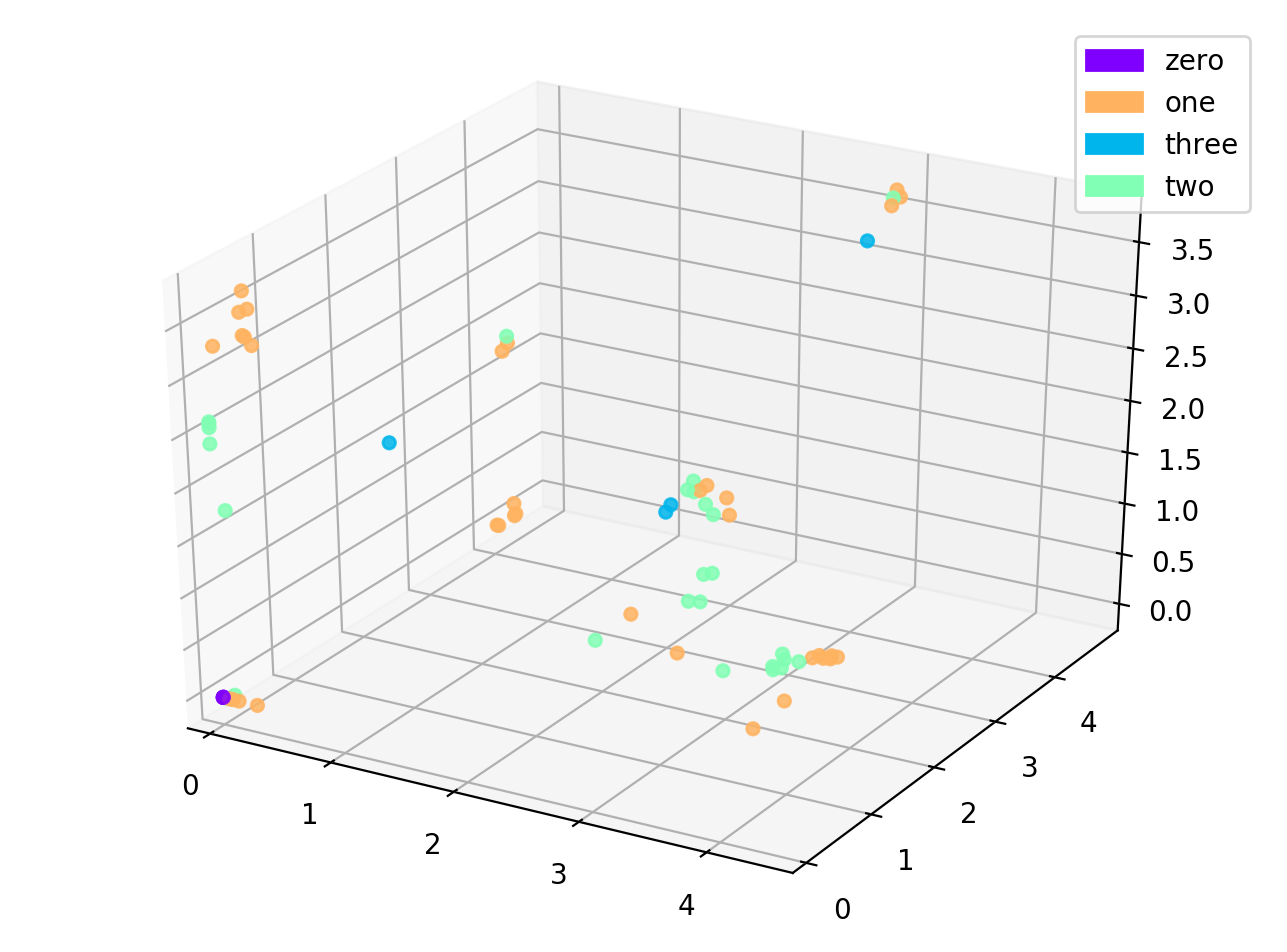

In [8]:
category_relation = graph.get_list_of_relation("TAKES_ARGUMENTS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
#tnse_pts = plotting.tsne2D(operator_embeds)
#plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1], operator_embeds[:,2], operator_labels)


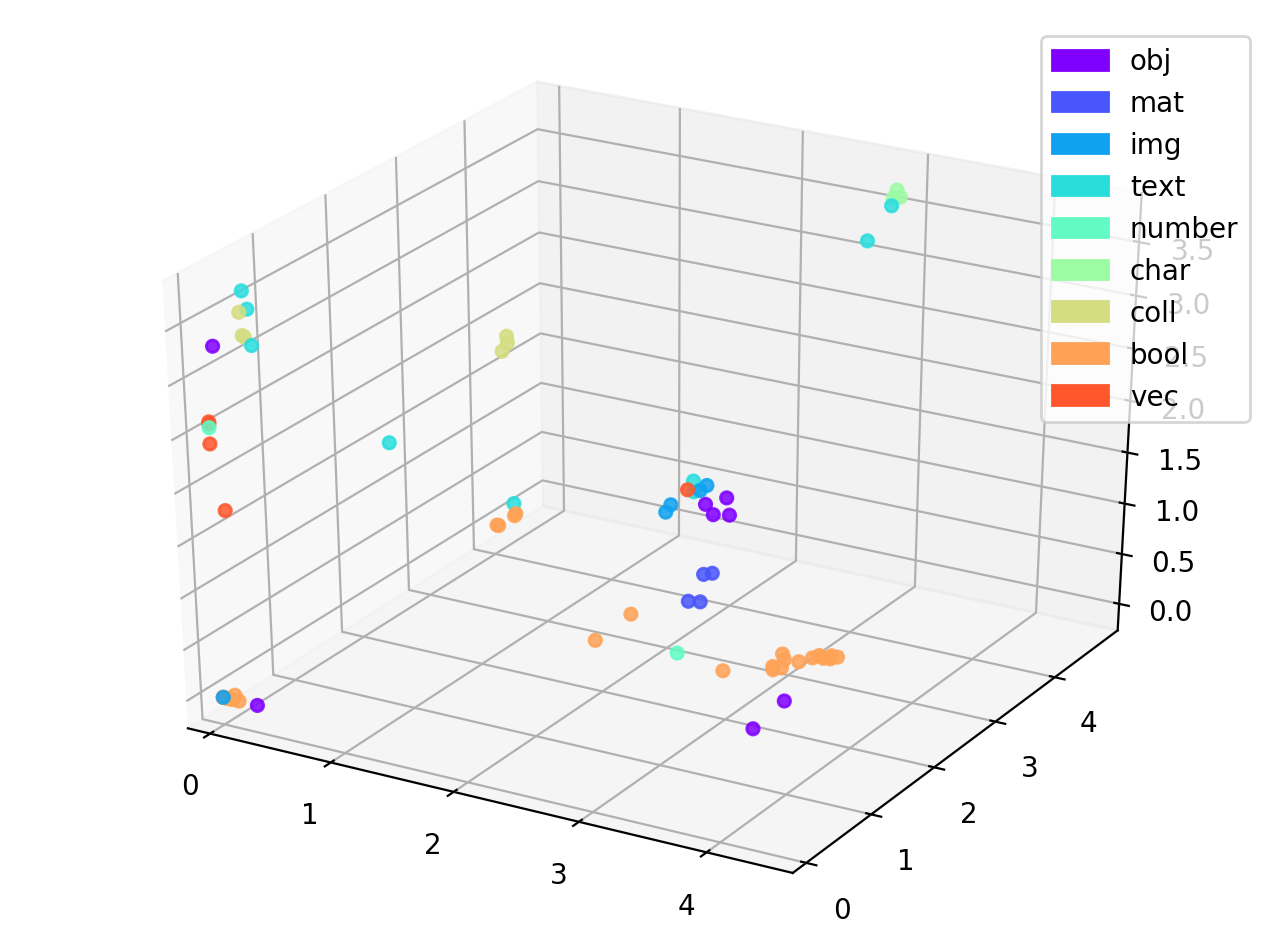

In [9]:
category_relation = graph.get_list_of_relation("RETURNS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
#tnse_pts = plotting.tsne2D(operator_embeds)
#plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1], operator_embeds[:,2], operator_labels)


In [10]:
category_relation = graph.get_list_of_relation("TAKES_ARGTYPE")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

AttributeError: 'module' object has no attribute 'tsne2D'